In [1]:
#Loading Libraries
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(hablar)
library(readxl)
library(unpivotr)
library(tidyverse)
library(tidyxl)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'glue'

The following object is masked from 'package:dplyr':

    collapse

Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:purrr':

    pluck

The following object is masked from 'package:readr':

    guess_encoding


Attaching package: 'hablar'

The following object is masked from 'package:dplyr':

    na_if



## Import and Export Data

In [2]:
"overseas-merchandise-trade-january-2019.xlsx" %>%  read_excel()
new_data <- xlsx_cells("overseas-merchandise-trade-january-2019.xlsx") %>% filter(sheet == "Table 2")%>%  rectify()%>% head(56) %>% tail(40)
new_data_2 <- as_tibble(new_data)
names(new_data_2) <- c("Row_Number","Year","Month","head1","Exports","head2","Export_change_Value","Imports",
                       "head3","Import_Change_Value","head4","head5","head6","head7","head8","head9","head10",
                       "head11","head12","head13")

New names:
* `` -> ...2


Overseas merchandise trade: January 2019,...2
<chr>,<chr>
NA,NA
List of tables,NA
1.01,"Overseas merchandise trade, actual values"
1.02,"Overseas merchandise trade, trade balance – actual values"
2,"Overseas merchandise trade, seasonally adjusted and trend values – monthly"
3,Exports by destination
4,Imports by country of origin
5,Exports of main commodities
6,Imports of main commodities


In [3]:
data1 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number <29) %>%
mutate(Year=2016)

data2 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number>29 & Row_Number<42) %>%
mutate(Year=2017)

data3 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number>42 & Row_Number<55) %>%
mutate(Year=2018)

data4 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number==56) %>%
mutate(Year=2019)

Export_Import_Data <- rbind(data1,data2,data3,data4) %>%
select(Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value)

In [51]:
Export_Import_Data_tidy <- transform(Export_Import_Data, 
         Year = round(as.numeric(Year),0) ,                         
         Exports = round(as.numeric(Exports),2),
         Export_change_Value = round(as.numeric(Export_change_Value),2),
         Imports = round(as.numeric(Imports),2),
         Import_Change_Value = round(as.numeric(Import_Change_Value),2))

Export_Import_Data_2018 <-Export_Import_Data_tidy %>%
filter(Year==2018)
Export_Import_Data_2018

Export_Import_Data_2017 <-Export_Import_Data_tidy %>%
filter(Year==2017)
Export_Import_Data_2017

Export_Import_Data_2017_2018 <- rbind(Export_Import_Data_2017,Export_Import_Data_2018)
Export_Import_Data_2017_2018

Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2018,Jan,4540,-12.8,5129,1.9
2018,Feb,4586,1.0,4793,-6.6
2018,Mar,4467,-2.6,5167,7.8
2018,Apr,4714,5.5,5180,0.3
2018,May,4668,-1.0,4936,-4.7
2018,Jun,4772,2.2,5430,10.0
2018,Jul,5068,6.2,5447,0.3
2018,Aug,4767,-5.9,5268,-3.3
2018,Sep,5133,7.7,5764,9.4


Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2017,Jan,4275,6.1,4474,3.7
2017,Feb,4122,-3.6,4560,1.9
2017,Mar,4134,0.3,4432,-2.8
2017,Apr,4600,11.3,4629,4.5
2017,May,4348,-5.5,4717,1.9
2017,Jun,4460,2.6,4522,-4.1
2017,Jul,4644,4.1,4617,2.1
2017,Aug,4328,-6.8,4523,-2.0
2017,Sep,4374,1.1,4713,4.2


Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2017,Jan,4275,6.1,4474,3.7
2017,Feb,4122,-3.6,4560,1.9
2017,Mar,4134,0.3,4432,-2.8
2017,Apr,4600,11.3,4629,4.5
2017,May,4348,-5.5,4717,1.9
2017,Jun,4460,2.6,4522,-4.1
2017,Jul,4644,4.1,4617,2.1
2017,Aug,4328,-6.8,4523,-2.0
2017,Sep,4374,1.1,4713,4.2


## Web Scraping Temperature Details

In [7]:
url <- "https://www.climatestotravel.com/climate/new-zealand"  # this is the base url from where the scraping starts
seasonality <- read_html(url) %>%
              html_table(fill=TRUE) # Reading and parsing the html of given webpage

Month_Value <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

seasonality_details <- data.frame(seasonality[1]) %>%
                      t() %>% 
                      data.frame() %>%
                      slice(-1) %>%
                      mutate(Month=Month_Value)

names(seasonality_details) <- c("Min(°C)","Max(°C)","Min(°F)","Max(°F)","Month")

seasonality_details_tidy <- seasonality_details %>% 
                            select(Month,"Min(°C)","Max(°C)","Min(°F)","Max(°F)") %>%
                            retype() # To convert factor value to numeric,the problem is commas instead of dots,
                                     #it replaces them with dots -from Stackoverflow.com
                           

seasonality_details_tidy

Month,Min(°C),Max(°C),Min(°F),Max(°F)
<chr>,<int>,<int>,<int>,<int>
Jan,16,24,61,75
Feb,17,24,63,75
Mar,15,23,59,73
Apr,13,20,55,68
May,11,17,52,63
Jun,8,15,46,59
Jul,8,14,46,57
Aug,8,15,46,59
Sep,10,16,50,61


In [119]:
# Joining Export-Import and Temperature
Export_Import_Temp_2018 <-merge(x = Export_Import_Data_2018, y = seasonality_details_tidy, by = "Month",sort = F)
Export_Import_Temp_2017 <-merge(x = Export_Import_Data_2017, y = seasonality_details_tidy, by = "Month",sort = F)

Export_Import_Temp_2017_2018 <- merge(x = Export_Import_Data_2017_2018, y = seasonality_details_tidy, by = "Month",sort = F)

In [120]:
Months.name <- c("Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov")

In [121]:
# Reference-https://www.datacamp.com/community/tutorials/facets-ggplot-r

variable_names <- list(
  "Exports" = "Exports in 2018" ,
  "Imports" = "Imports in 2018",
   "Max(°C)" = "Average Temperature of New Zealand"
)

variable_names_2017 <- list(
  "Exports" = "Exports in 2017" ,
  "Imports" = "Imports in 2017",
   "Max(°C)" = "Average Temperature of New Zealand"
)

variable_labeller <- function(variable,value){
  return(variable_names[value])
                    }

variable_labeller_2017 <- function(variable,value){
  return(variable_names_2017[value])
                    }

In [122]:
impexp<-bind_rows(Export_Import_Data_2018,Export_Import_Data_2017)
impexp%>%head(2)

Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2018,Jan,4540,-12.8,5129,1.9
2018,Feb,4586,1.0,4793,-6.6


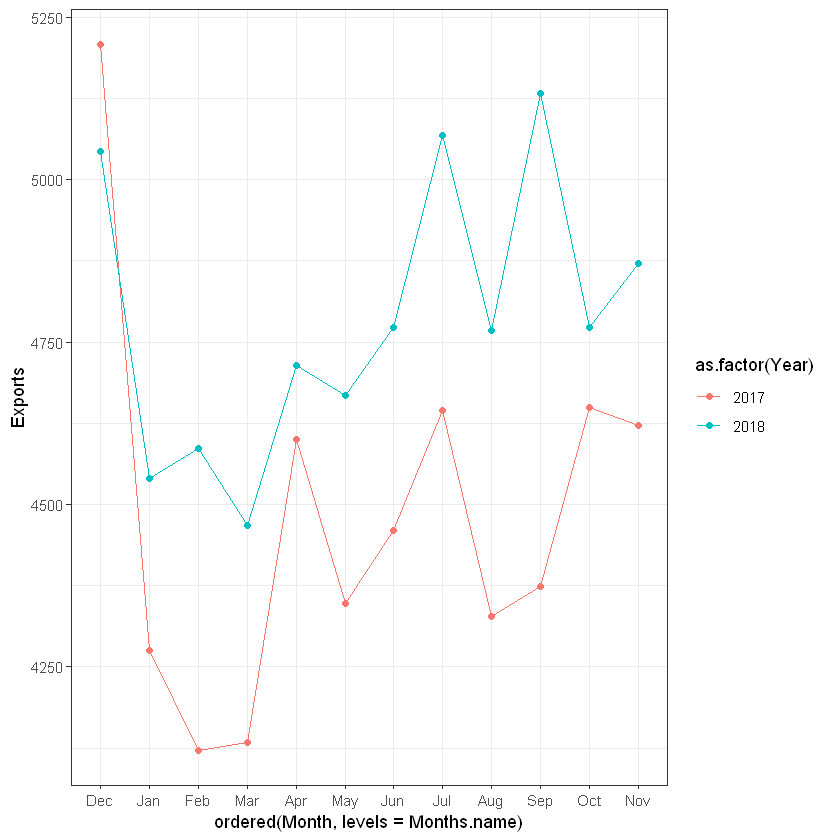

In [123]:
p <- ggplot(data = impexp, aes(x=ordered(Month,levels=Months.name), y = Exports)) + 
  geom_point(aes(color = as.factor(Year))) + geom_line(aes(group = as.factor(Year)
                                                           ,color = as.factor(Year)))+
  theme_bw()
p

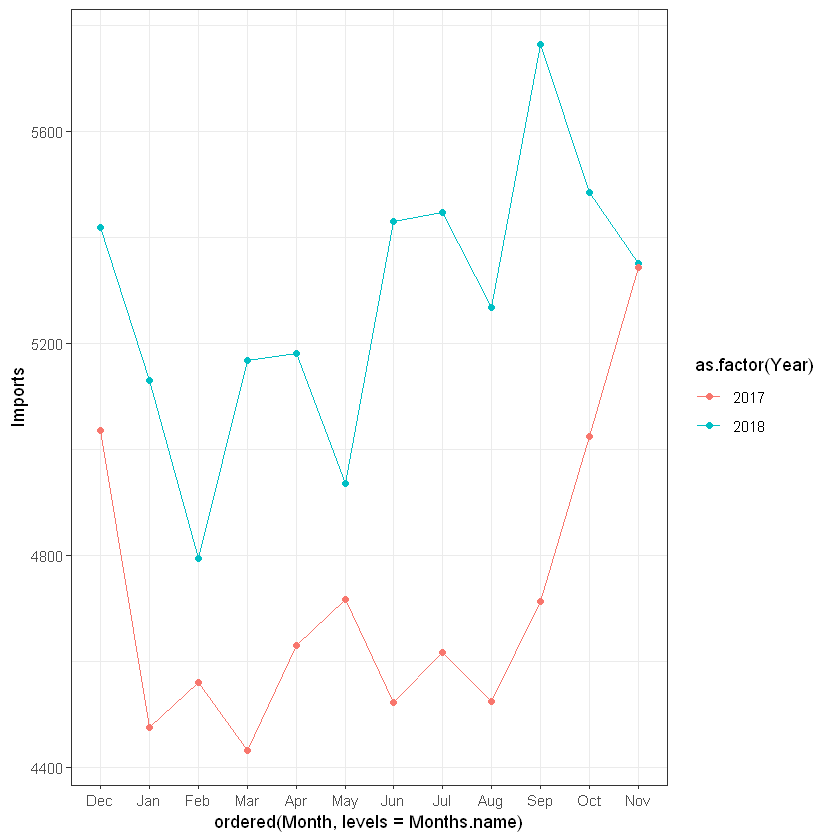

In [124]:
q <- ggplot(data = impexp, aes(x=ordered(Month,levels=Months.name), y = Imports)) + 
  geom_point(aes(color = as.factor(Year))) + geom_line(aes(group = as.factor(Year),color = as.factor(Year)))+
#geom_tile(aes(fill = "Min(°C)")) + 
  #scale_fill_gradient(low = "yellow", high = "red")+
  theme_bw()
q

In [125]:
Export_Import_Temp_2018 <- gather(Export_Import_Temp_2018, key="measure", value="value", c("Exports", "Imports","Max(°C)"))
Export_Import_Temp_2017 <- gather(Export_Import_Temp_2017, key="measure", value="value", c("Exports", "Imports","Max(°C)"))

Export_Import_Temp <- gather(Export_Import_Temp_2017_2018, key="measure", value="value", c("Exports", "Imports","Max(°C)"))
Export_Import_Temp

Month,Year,Export_change_Value,Import_Change_Value,Min(°C),Min(°F),Max(°F),measure,value
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
Jan,2017,6.1,3.7,16,61,75,Exports,4275
Jan,2018,-12.8,1.9,16,61,75,Exports,4540
Feb,2017,-3.6,1.9,17,63,75,Exports,4122
Feb,2018,1.0,-6.6,17,63,75,Exports,4586
Mar,2017,0.3,-2.8,15,59,73,Exports,4134
Mar,2018,-2.6,7.8,15,59,73,Exports,4467
Apr,2017,11.3,4.5,13,55,68,Exports,4600
Apr,2018,5.5,0.3,13,55,68,Exports,4714
May,2017,-5.5,1.9,11,52,63,Exports,4348


In [126]:
c <-inner_join(Export_Import_Temp,Export_Import_Data_2017_2018,by=c("Month","Export_change_Value","Import_Change_Value","Year","Export_change_Value")) #%>% filter(Year.x=="2017")
head(c)


Month,Year,Export_change_Value,Import_Change_Value,Min(°C),Min(°F),Max(°F),measure,value,Exports,Imports
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
Jan,2017,6.1,3.7,16,61,75,Exports,4275,4275,4474
Jan,2018,-12.8,1.9,16,61,75,Exports,4540,4540,5129
Feb,2017,-3.6,1.9,17,63,75,Exports,4122,4122,4560
Feb,2018,1.0,-6.6,17,63,75,Exports,4586,4586,4793
Mar,2017,0.3,-2.8,15,59,73,Exports,4134,4134,4432
Mar,2018,-2.6,7.8,15,59,73,Exports,4467,4467,5167


In [127]:
a <-inner_join(Export_Import_Temp_2018,Export_Import_Data_2018,by=c("Month","Export_change_Value","Import_Change_Value","Year","Export_change_Value")) #%>% filter(Year.x=="2017")
head(a)

Month,Year,Export_change_Value,Import_Change_Value,Min(°C),Min(°F),Max(°F),measure,value,Exports,Imports
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
Jan,2018,-12.8,1.9,16,61,75,Exports,4540,4540,5129
Feb,2018,1.0,-6.6,17,63,75,Exports,4586,4586,4793
Mar,2018,-2.6,7.8,15,59,73,Exports,4467,4467,5167
Apr,2018,5.5,0.3,13,55,68,Exports,4714,4714,5180
May,2018,-1.0,-4.7,11,52,63,Exports,4668,4668,4936
Jun,2018,2.2,10.0,8,46,59,Exports,4772,4772,5430


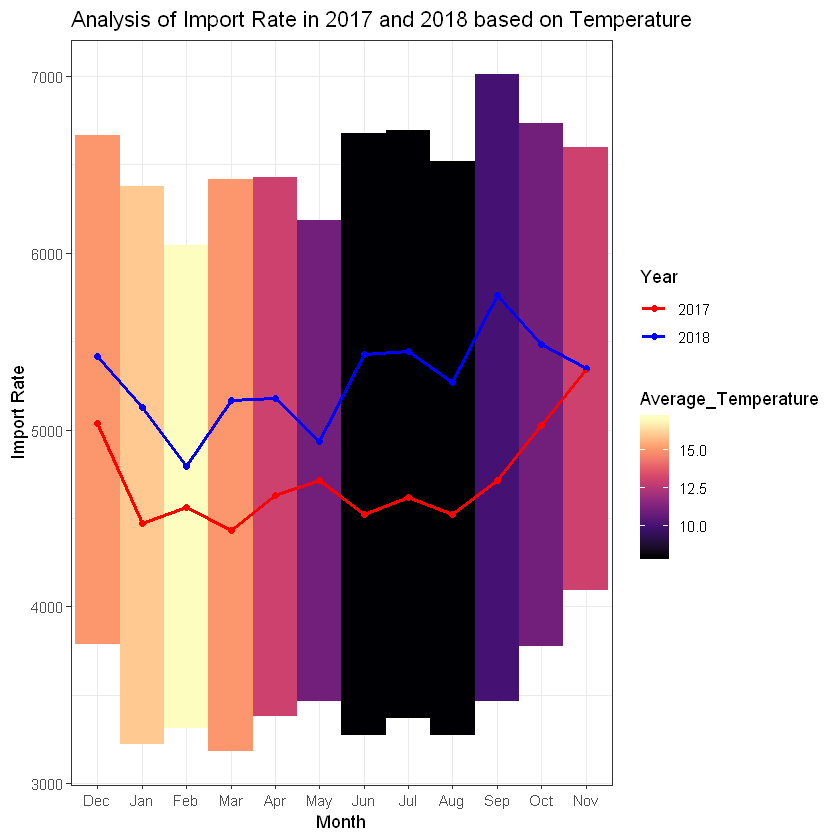

In [132]:
Average_Temperature <- c$"Min(°C)"


ggplot(data = c, aes(x=ordered(Month,levels=Months.name), y = Imports)) + 
 
  geom_tile(aes(fill = Average_Temperature,height=2500))+ 
  geom_point(aes(color = as.factor(Year)),size = 1.5) + 
  geom_line(aes(group = as.factor(Year),color = as.factor(Year)),size = 1)+
  scale_color_manual(values=c("red", "blue"))+
  scale_fill_viridis_c(option="A")+
  ggtitle("Analysis of Import Rate in 2017 and 2018 based on Temperature") + xlab("Month")+ ylab("Import Rate") +
  labs(col="Year") + 
  #geom_tile(aes(fill = "Min(°C)")) + 
  theme_bw()
  ggsave("Import_Temperature_Analysis.png",width=10,height=6,dpi=100)

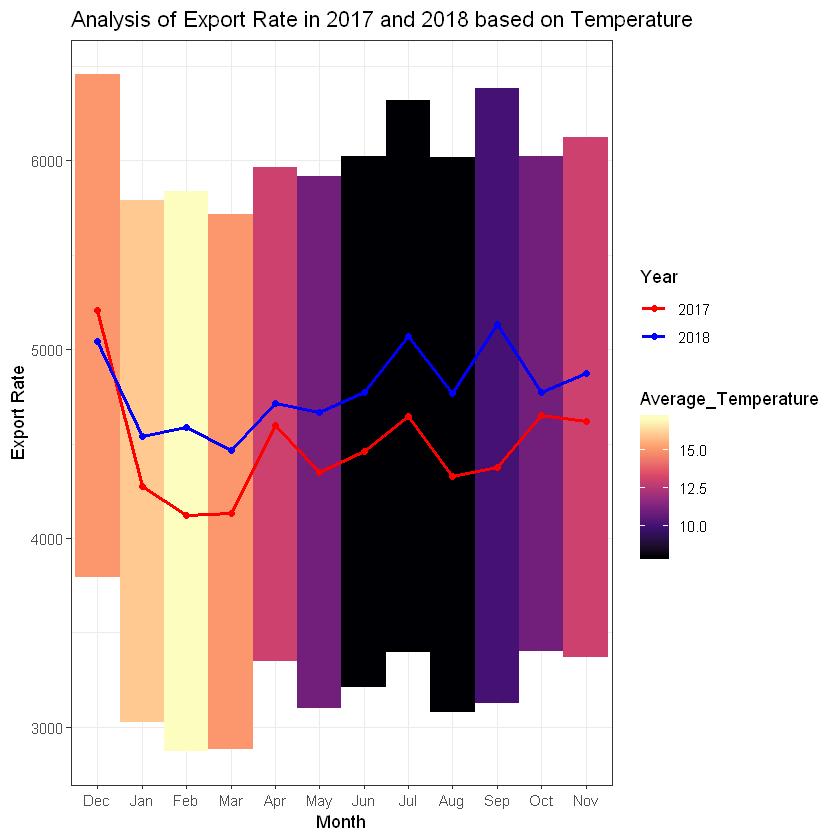

In [133]:
# Reference https://stackoverflow.com/questions/23635662/editing-legend-text-labels-in-ggplot
Average_Temperature <- c$"Min(°C)"


ggplot(data = c, aes(x=ordered(Month,levels=Months.name), y = Exports)) + 
 
  geom_tile(aes(fill = Average_Temperature,height=2500))+ 
  geom_point(aes(color = as.factor(Year)),size = 1.5) + 
  geom_line(aes(group = as.factor(Year),color = as.factor(Year)),size = 1)+
  scale_color_manual(values=c("red", "blue"))+
  scale_fill_viridis_c(option="A")+
  ggtitle("Analysis of Export Rate in 2017 and 2018 based on Temperature") + xlab("Month") + ylab("Export Rate") +
  labs(col="Year") + 
  theme_bw()
  ggsave("Export_Temperature_Analysis.png",width=10,height=6,dpi=100)

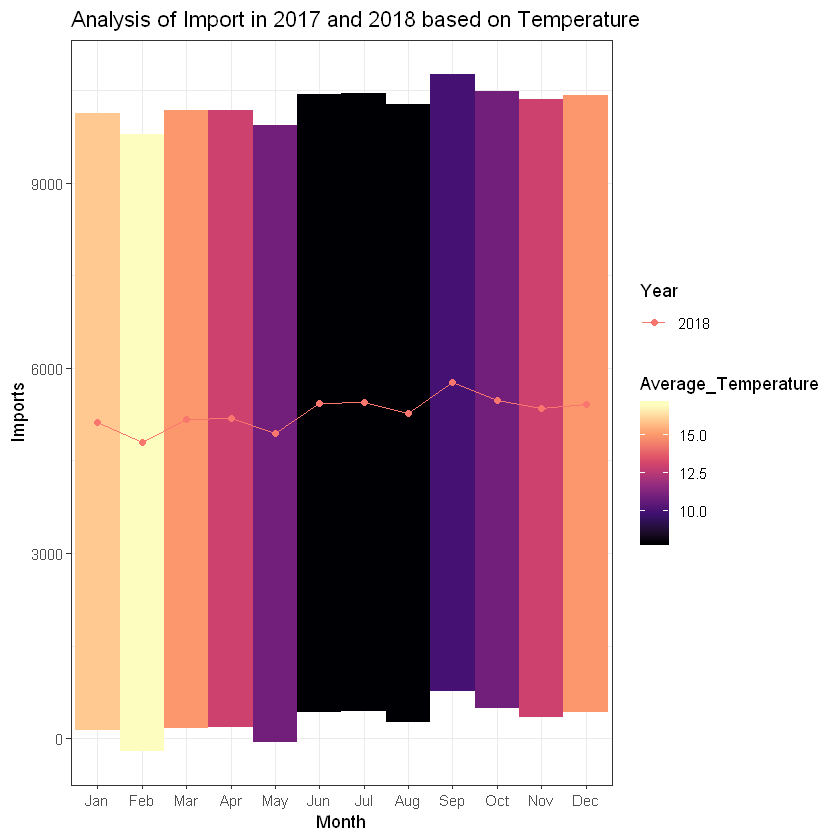

In [40]:
Average_Temperature <- a$"Min(°C)"


ggplot(data = a, aes(x=ordered(Month,levels=Months.name), y = Imports)) + 
 
  geom_tile(aes(fill = Average_Temperature,height=10000))+ geom_point(aes(color = as.factor(Year))) + 
  geom_line(aes(group = as.factor(Year),color = as.factor(Year)))+scale_fill_viridis_c(option="A")+
  ggtitle("Analysis of Import in 2017 and 2018 based on Temperature") + xlab("Month")+
  labs(col="Year") + 
  #geom_tile(aes(fill = "Min(°C)")) + 
  theme_bw()